# konfigurasi

In [4]:
from google_play_scraper import app, reviews_all, Sort, permissions,reviews
import pandas as pd
import re
import string
import matplotlib.pyplot as plt

# Bisnis Understanding

# Data Undertanding

## Mengambil Data

In [5]:
import pandas as pd
from google_play_scraper import Sort, reviews
reviews_all_app = reviews_all(
    'com.bca.mybca.omni.android',
    lang='id', # defaults to 'en'
    country='id', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
    filter_score_with=None # defaults to None (means all score))
)
# Mengubah data review menjadi DataFrame pandas
df_reviews_all = pd.DataFrame(reviews_all_app)


## df_reviews_all (data yang akan di anilisis)

In [6]:
df_reviews_all.head(5)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,348a6925-73b1-452c-b948-0040dce5df5f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ribet loginmya,1,0,1.24.0,2024-07-22 16:06:40,Mohon maaf atas ketidaknyamanannya Bapak/Ibu. ...,2024-07-22 17:09:31,1.24.0
1,286addb9-6089-47db-81c0-2e24b16046b2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sangat membantu buat saya yang sedang merantau...,5,0,1.24.0,2024-07-22 15:30:18,Terima kasih atas ulasannya. Semoga aplikasi m...,2024-07-22 15:41:59,1.24.0
2,3a3ad41b-be92-44e0-8d4e-47e77af30967,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Mke mybca saldo sering ilang Pertama 10rb Kedu...,1,0,None,2024-07-22 15:14:42,"Mohon maaf atas kendala yang Bapak/Ibu alami, ...",2024-07-22 15:40:52,None
3,0f9c37f2-4a07-40ff-ab28-c360171100d0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Mudah Dan Praktis,5,0,1.24.0,2024-07-22 14:50:04,Terima kasih atas ulasannya. Semoga aplikasi m...,2024-07-22 15:40:11,1.24.0
4,0c26990b-9daf-4192-a692-bc788ab6edbe,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saya sudah daftar dan sudh aktif di aplikasi m...,2,0,1.24.0,2024-07-22 14:41:56,Mohon maaf atas ketidaknyamanannya Bpk/Ibu. Ap...,2024-07-22 15:39:15,1.24.0


### Deskriptif Statistik

In [7]:
df_reviews_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12070 entries, 0 to 12069
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              12070 non-null  object        
 1   userName              12070 non-null  object        
 2   userImage             12070 non-null  object        
 3   content               12070 non-null  object        
 4   score                 12070 non-null  int64         
 5   thumbsUpCount         12070 non-null  int64         
 6   reviewCreatedVersion  9303 non-null   object        
 7   at                    12070 non-null  datetime64[ns]
 8   replyContent          12070 non-null  object        
 9   repliedAt             12070 non-null  datetime64[ns]
 10  appVersion            9303 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 1.0+ MB


In [8]:
df_reviews_all.describe()

,score,thumbsUpCount,at,repliedAt
count,12070.000000,12070.000000,12070,12070
mean,3.092129,1.801326,2023-06-01 19:08:21.975559168,2023-06-01 23:28:48.333885696
min,1.000000,0.000000,2021-05-03 14:55:26,2021-05-04 13:26:03
25%,1.000000,0.000000,2022-06-24 11:19:24.249999872,2022-06-24 11:42:36
50%,3.000000,0.000000,2023-10-31 14:34:08.500000,2023-10-31 15:36:32.500000
75%,5.000000,0.000000,2024-03-30 06:09:03.500000,2024-03-30 07:50:39.500000
max,5.000000,1422.000000,2024-07-22 16:06:40,2024-07-22 17:09:31
std,1.823507,18.348035,NaN,NaN


### Analisis Univariat

In [9]:
# Convert 'at' and 'repliedAt' to datetime
df_reviews_all['at'] = pd.to_datetime(df_reviews_all['at'])
df_reviews_all['repliedAt'] = pd.to_datetime(df_reviews_all['repliedAt'])

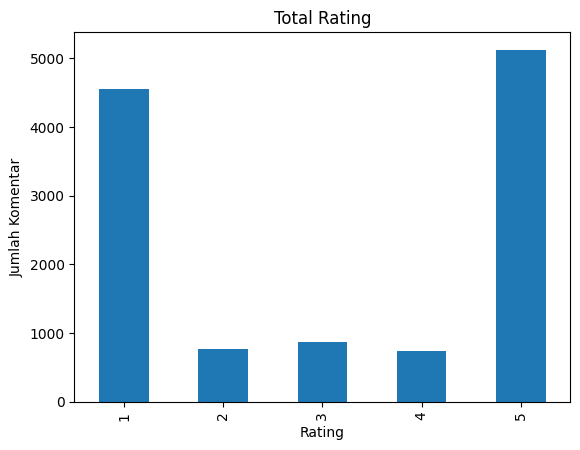

In [10]:
# @title total Score
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_reviews_all is your DataFrame
# Ensure the score column is of type integer
df_reviews_all['score'] = df_reviews_all['score'].astype(int)

# Get the value counts and sort by index (score)
score_counts = df_reviews_all['score'].value_counts().sort_index()

# Plotting the bar chart
score_counts.plot(kind='bar')
plt.title('Total Rating')
plt.xlabel('Rating')
plt.ylabel('Jumlah Komentar')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=[1, 2, 3, 4, 5])  # Ensure x-ticks are labeled correctly
plt.show()


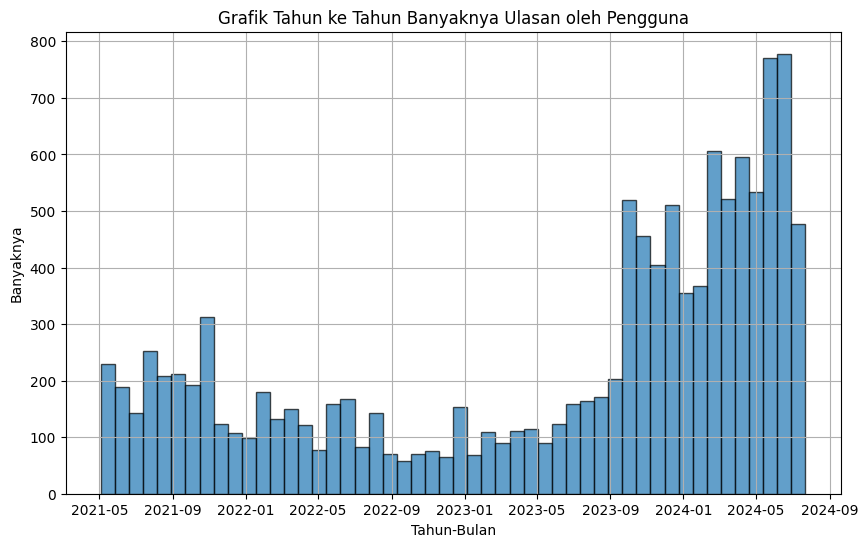

In [11]:
#@title Distribution of 'at' (review times)
plt.figure(figsize=(10, 6))
df_reviews_all['at'].hist(bins=50, edgecolor='k', alpha=0.7)
plt.title('Grafik Tahun ke Tahun Banyaknya Ulasan oleh Pengguna')
plt.xlabel('Tahun-Bulan')
plt.ylabel('Banyaknya')
plt.grid(True)
plt.show()



### Analisis Multivariat
1. **Korelasi antara variabel numerik**: Score dan ThumbsUpCount.
2. **Distribusi Score menurut Versi Aplikasi**.
3. **Trend Ulasan dari Waktu ke Waktu**.


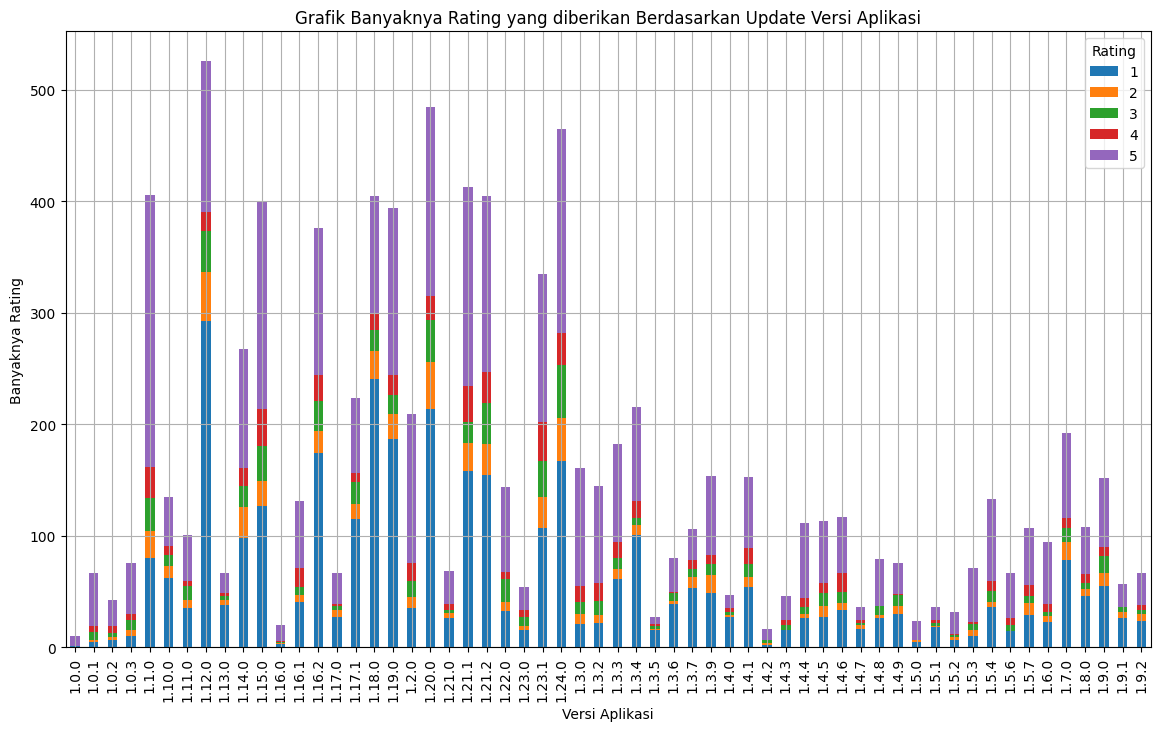

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
# @title Distribusi Score menurut Versi Aplikasi
# Prepare the data
app_version_scores = df_reviews_all.groupby(['appVersion', 'score']).size().unstack().fillna(0)

# Plot the count plot using matplotlib
plt.figure(figsize=(14, 8))

# Create the bar plots
app_version_scores.plot(kind='bar', stacked=True, ax=plt.gca())

# Set the title and labels
plt.title('Grafik Banyaknya Rating yang diberikan Berdasarkan Update Versi Aplikasi')
plt.xlabel('Versi Aplikasi')
plt.ylabel('Banyaknya Rating')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Add legend and grid
plt.legend(title='Rating')
plt.grid(True)

# Show plot
plt.show()


/tmp/ipykernel_5081/1703448791.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_reviews_all.set_index('at').resample('M').size().plot(marker='o')


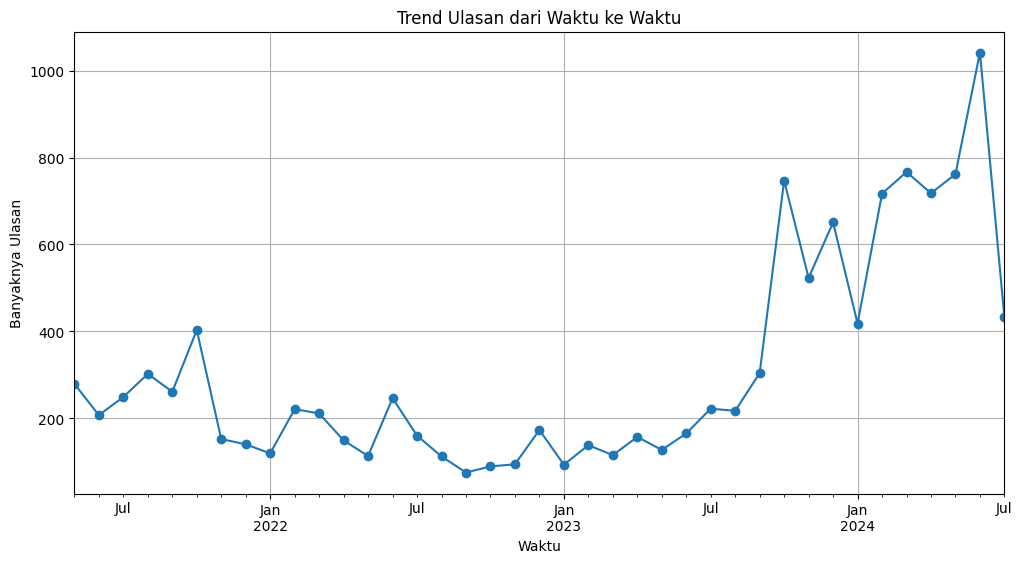

In [13]:
# @title Trend Ulasan dari Waktu ke Waktu
plt.figure(figsize=(12, 6))
df_reviews_all.set_index('at').resample('M').size().plot(marker='o')
plt.title('Trend Ulasan dari Waktu ke Waktu')
plt.xlabel('Waktu')
plt.ylabel('Banyaknya Ulasan')
plt.grid(True)
plt.show()

# **Data Preparation**

## Data Collection

In [14]:
df_reviews_all.head(2)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,348a6925-73b1-452c-b948-0040dce5df5f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ribet loginmya,1,0,1.24.0,2024-07-22 16:06:40,Mohon maaf atas ketidaknyamanannya Bapak/Ibu. ...,2024-07-22 17:09:31,1.24.0
1,286addb9-6089-47db-81c0-2e24b16046b2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sangat membantu buat saya yang sedang merantau...,5,0,1.24.0,2024-07-22 15:30:18,Terima kasih atas ulasannya. Semoga aplikasi m...,2024-07-22 15:41:59,1.24.0


In [15]:
# @title drop Data
df_reviews_all_proses = df_reviews_all.copy()
df_reviews_all_proses.drop(columns=['userName','userImage','replyContent','repliedAt','reviewCreatedVersion','thumbsUpCount','replyContent','repliedAt','appVersion','at'], inplace=True)

In [16]:
# @title Mengubah lokasi fiture untuk memudahkan pengerjaan
df_reviews_all_proses = df_reviews_all_proses.loc[:, ['reviewId', 'score', 'content']]
df_reviews_all_proses.head(2)

,reviewId,score,content
0,348a6925-73b1-452c-b948-0040dce5df5f,1,Ribet loginmya
1,286addb9-6089-47db-81c0-2e24b16046b2,5,Sangat membantu buat saya yang sedang merantau...


## Data Cleaning

### Case Folding

In [17]:
# @title mengubah data ke huruf kecil
df_reviews_all_proses['content_cleaning'] = df_reviews_all_proses['content'].str.lower()
df_reviews_all_proses.head()

,reviewId,score,content,content_cleaning
0,348a6925-73b1-452c-b948-0040dce5df5f,1,Ribet loginmya,ribet loginmya
1,286addb9-6089-47db-81c0-2e24b16046b2,5,Sangat membantu buat saya yang sedang merantau...,sangat membantu buat saya yang sedang merantau...
2,3a3ad41b-be92-44e0-8d4e-47e77af30967,1,Mke mybca saldo sering ilang Pertama 10rb Kedu...,mke mybca saldo sering ilang pertama 10rb kedu...
3,0f9c37f2-4a07-40ff-ab28-c360171100d0,5,Mudah Dan Praktis,mudah dan praktis
4,0c26990b-9daf-4192-a692-bc788ab6edbe,2,Saya sudah daftar dan sudh aktif di aplikasi m...,saya sudah daftar dan sudh aktif di aplikasi m...


In [18]:
# @title mengubah emot ke text

import re
import pandas as pd

emoji_dict = {
    "\U0001F600": "senang",  # Grinning Face
    "\U0001F601": "sangat senang",  # Grinning Face with Smiling Eyes
    "\U0001F602": "tertawa terbahak",  # Face with Tears of Joy
    "\U0001F603": "senang",  # Smiling Face with Open Mouth
    "\U0001F604": "sangat senang",  # Smiling Face with Open Mouth and Smiling Eyes
    "\U0001F605": "lega",  # Smiling Face with Open Mouth and Cold Sweat
    "\U0001F606": "tertawa lebar",  # Smiling Face with Open Mouth and Tightly Closed Eyes
    "\U0001F609": "menggoda",  # Winking Face
    "\U0001F60A": "bahagia",  # Smiling Face with Smiling Eyes
    "\U0001F60B": "nikmat",  # Face Savoring Delicious Food
    "\U0001F60C": "lega",  # Relieved Face
    "\U0001F60D": "jatuh cinta",  # Smiling Face with Heart-Eyes
    "\U0001F60E": "keren",  # Smiling Face with Sunglasses
    "\U0001F60F": "sinis",  # Smirking Face
    "\U0001F612": "takut",  # Unamused Face
    "\U0001F613": "keringat",  # Face with Cold Sweat
    "\U0001F614": "sedih",  # Pensive Face
    "\U0001F616": "sakit",  # Confounded Face
    "\U0001F618": "mencium",  # Face Throwing a Kiss
    "\U0001F621": "marah",  # Pouting Face
    "\U0001F622": "menangis",  # Crying Face
    "\U0001F623": "frustasi",  # Persevering Face
    "\U0001F624": "kesal",  # Face with Look of Triumph
    "\U0001F625": "cemas",  # Disappointed but Relieved Face
    "\U0001F628": "takut",  # Fearful Face
    "\U0001F629": "lelah",  # Weary Face
    "\U0001F62A": "mengantuk",  # Sleepy Face
    "\U0001F62B": "lelah",  # Tired Face
    "\U0001F62D": "sangat sedih",  # Loudly Crying Face
    "\U0001F630": "terkejut",  # Face with Open Mouth and Cold Sweat
    "\U0001F631": "ketakutan",  # Face Screaming in Fear
    "\U0001F632": "terkejut",  # Astonished Face
    "\U0001F633": "malu",  # Flushed Face
    "\U0001F635": "pingsan",  # Dizzy Face
    "\U0001F637": "sakit",  # Face with Medical Mask
    "\U0001F641": "sedih",  # Slightly Frowning Face
    "\U0001F642": "tersenyum",  # Slightly Smiling Face
    "\U0001F643": "terbalik",  # Upside-Down Face
    "\U0001F644": "melirik",  # Face with Rolling Eyes
    "\U0001F44D": "setuju",  # Thumbs Up
    "\U0001F44E": "tidak setuju",  # Thumbs Down
    "\U0001F44C": "ok",  # OK Hand
    "\U0001F44F": "tepuk tangan",  # Clapping Hands
    "\U0001F44A": "tinju",  # Fisted Hand Sign
    "\U0001F91E": "menyilang jari",  # Crossed Fingers
    "\U0001F64C": "angkat tangan",  # Raising Hands
    "\U0001F64F": "berdoa",
    "\U0001F97A":""# Folded Hands
}
def replace_emojis_with_meanings(text):
    def replace(match):
        emoji_char = match.group()
        emoji_meaning = emoji_dict.get(emoji_char, "")
        return f" {emoji_meaning} "

    # Pola untuk menemukan semua emotikon dalam teks
    emoji_pattern = re.compile("|".join(map(re.escape, emoji_dict.keys())))
    # Mengganti semua emotikon yang ditemukan dengan artinya
    text_with_meanings = emoji_pattern.sub(replace, text)

    # Menghapus emotikon yang tidak dikenal
    non_known_emoji_pattern = re.compile(r'[^\w\s,.?!]')
    text_cleaned = non_known_emoji_pattern.sub('', text_with_meanings)

    # Menghapus spasi tambahan yang mungkin muncul setelah penggantian
    return ' '.join(text_cleaned.split())

# Terapkan fungsi pengganti emoji
df_reviews_all_proses['content_cleaning'] = df_reviews_all_proses['content_cleaning'].apply(replace_emojis_with_meanings)


df_reviews_all_proses.head()

,reviewId,score,content,content_cleaning
0,348a6925-73b1-452c-b948-0040dce5df5f,1,Ribet loginmya,ribet loginmya
1,286addb9-6089-47db-81c0-2e24b16046b2,5,Sangat membantu buat saya yang sedang merantau...,sangat membantu buat saya yang sedang merantau...
2,3a3ad41b-be92-44e0-8d4e-47e77af30967,1,Mke mybca saldo sering ilang Pertama 10rb Kedu...,mke mybca saldo sering ilang pertama 10rb kedu...
3,0f9c37f2-4a07-40ff-ab28-c360171100d0,5,Mudah Dan Praktis,mudah dan praktis
4,0c26990b-9daf-4192-a692-bc788ab6edbe,2,Saya sudah daftar dan sudh aktif di aplikasi m...,saya sudah daftar dan sudh aktif di aplikasi m...


In [19]:
# @title menghapus kode html , simbo simbol, urls
# hapus kode html
def remove_html_tags(text):
    clean_text = re.sub('<.*>', '', text)
    return clean_text

# hapus simbol smbol
def hapus_simbol(teks):
  return teks.translate(str.maketrans('', '', string.punctuation))

# hapus url
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    clean_text = re.sub(url_pattern, '', text)
    return clean_text

df_reviews_all_proses['content_cleaning'] = df_reviews_all_proses['content_cleaning'].apply(remove_urls)
df_reviews_all_proses['content_cleaning'] = df_reviews_all_proses['content_cleaning'].apply(remove_html_tags)
df_reviews_all_proses['content_cleaning'] = df_reviews_all_proses['content_cleaning'].apply(hapus_simbol)

df_reviews_all_proses.head(20)

,reviewId,score,content,content_cleaning
0,348a6925-73b1-452c-b948-0040dce5df5f,1,Ribet loginmya,ribet loginmya
1,286addb9-6089-47db-81c0-2e24b16046b2,5,Sangat membantu buat saya yang sedang merantau...,sangat membantu buat saya yang sedang merantau...
2,3a3ad41b-be92-44e0-8d4e-47e77af30967,1,Mke mybca saldo sering ilang Pertama 10rb Kedu...,mke mybca saldo sering ilang pertama 10rb kedu...
3,0f9c37f2-4a07-40ff-ab28-c360171100d0,5,Mudah Dan Praktis,mudah dan praktis
4,0c26990b-9daf-4192-a692-bc788ab6edbe,2,Saya sudah daftar dan sudh aktif di aplikasi m...,saya sudah daftar dan sudh aktif di aplikasi m...
5,ed25771b-39e8-4ca2-8b2f-06b588853dce,5,sudah bagus,sudah bagus
6,fd722c56-5e19-4d38-8e69-6144c2fb6ede,5,bagus,bagus
7,a6877f62-9f13-44d0-9980-72a771692c0f,5,"Bagus banget,bisa lewat paylater juga",bagus bangetbisa lewat paylater juga
8,e6684580-728f-42d2-ade9-f8c7a781d2c5,1,customernya pada ribet ya mau bikin rekening j...,customernya pada ribet ya mau bikin rekening j...
9,22ef549b-9ecc-4ebb-a48a-7500b62b6f67,5,Ok,ok


In [20]:
import pandas as pd
import re

# Definisikan fungsi untuk mengonversi angka ke huruf
def angka_ke_huruf(angka):
    satuan = ["", "satu", "dua", "tiga", "empat", "lima", "enam", "tujuh", "delapan", "sembilan", "sepuluh", "sebelas"]

    if angka < 12:
        return satuan[angka]
    elif angka < 20:
        return satuan[angka - 10] + " belas"
    elif angka < 100:
        return satuan[angka // 10] + " puluh" + (" " + satuan[angka % 10] if (angka % 10 != 0) else "")
    elif angka < 200:
        return "seratus" + (" " + angka_ke_huruf(angka - 100) if (angka > 100) else "")
    elif angka < 1000:
        return satuan[angka // 100] + " ratus" + (" " + angka_ke_huruf(angka % 100) if (angka % 100 != 0) else "")
    elif angka < 2000:
        return "seribu" + (" " + angka_ke_huruf(angka - 1000) if (angka > 1000) else "")
    elif angka < 1000000:
        return angka_ke_huruf(angka // 1000) + " ribu" + (" " + angka_ke_huruf(angka % 1000) if (angka % 1000 != 0) else "")
    elif angka < 1000000000:
        return angka_ke_huruf(angka // 1000000) + " juta" + (" " + angka_ke_huruf(angka % 1000000) if (angka % 1000000 != 0) else "")
    else:
        return "Angka terlalu besar"

# Definisikan fungsi untuk mengonversi angka dalam teks menjadi huruf tanpa memperhatikan satuan
def remove_pattern(text):
    def ganti_angka(match):
        angka_str = match.group(0)
        angka = int(re.sub(r'\D', '', angka_str))  # Menghapus karakter non-digit
        return angka_ke_huruf(angka)

    return re.sub(r'\b\d+\b', ganti_angka, text)

# Terapkan fungsi pada kolom 'content_cleaning'
df_reviews_all_proses['content_cleaning'] = df_reviews_all_proses['content_cleaning'].apply(remove_pattern)
df_reviews_all_proses.head(5)


,reviewId,score,content,content_cleaning
0,348a6925-73b1-452c-b948-0040dce5df5f,1,Ribet loginmya,ribet loginmya
1,286addb9-6089-47db-81c0-2e24b16046b2,5,Sangat membantu buat saya yang sedang merantau...,sangat membantu buat saya yang sedang merantau...
2,3a3ad41b-be92-44e0-8d4e-47e77af30967,1,Mke mybca saldo sering ilang Pertama 10rb Kedu...,mke mybca saldo sering ilang pertama 10rb kedu...
3,0f9c37f2-4a07-40ff-ab28-c360171100d0,5,Mudah Dan Praktis,mudah dan praktis
4,0c26990b-9daf-4192-a692-bc788ab6edbe,2,Saya sudah daftar dan sudh aktif di aplikasi m...,saya sudah daftar dan sudh aktif di aplikasi m...


## Text Preprocessing

### Normalisasi Kata

In [21]:
#@title membuat kamus sendiri berdasarkan ulasan
from collections import Counter
import pandas as pd

text = " ".join(df_reviews_all_proses['content_cleaning'])
tokens = text.split()

# Menghitung frekuensi kemunculan setiap kata
word_counts = Counter(tokens)

# Mengambil kata dengan frekuensi kemunculan tertinggi
top_words = word_counts.most_common(25000)

word, count = zip(*top_words)
data_kata = pd.DataFrame({'kata': word,'count':count})
data_kata.head()

,kata,count
0,bca,3150
1,di,2824
2,bisa,2646
3,aplikasi,2233
4,dan,2098


In [22]:
#@title menerapkan kamus yang telah dibuat
import pandas as pd

# Fungsi penggantian kata tidak baku
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
            else:
                replaced_words.append(word)
        replaced_text = ' '.join(replaced_words)
    else:
        replaced_text = ''
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

# Baca kamus kata tidak baku
kamus_data = pd.read_excel("https://github.com/nsyamsu23/kamus/raw/main/kamuskatabaku.xlsx")
kamus_tidak_baku = pd.Series(kamus_data["kata_baku"],index=kamus_data["tidak_baku"]).to_dict()


# Aplikasikan fungsi replace_taboo_words pada kolom content_cleaning
df_reviews_all_proses['content_cleaning_normalized'] = df_reviews_all_proses['content_cleaning'].apply(lambda x: replace_taboo_words(x, kamus_tidak_baku)[0])
df_reviews_all_proses.head()

,reviewId,score,content,content_cleaning,content_cleaning_normalized
0,348a6925-73b1-452c-b948-0040dce5df5f,1,Ribet loginmya,ribet loginmya,ribet loginmya
1,286addb9-6089-47db-81c0-2e24b16046b2,5,Sangat membantu buat saya yang sedang merantau...,sangat membantu buat saya yang sedang merantau...,sangat membantu buat saya yang sedang merantau...
2,3a3ad41b-be92-44e0-8d4e-47e77af30967,1,Mke mybca saldo sering ilang Pertama 10rb Kedu...,mke mybca saldo sering ilang pertama 10rb kedu...,mke mybca saldo sering pertama 10rb kedua 20rb...
3,0f9c37f2-4a07-40ff-ab28-c360171100d0,5,Mudah Dan Praktis,mudah dan praktis,mudah dan praktis
4,0c26990b-9daf-4192-a692-bc788ab6edbe,2,Saya sudah daftar dan sudh aktif di aplikasi m...,saya sudah daftar dan sudh aktif di aplikasi m...,saya sudah daftar dan aktif di aplikasi my say...


In [23]:
# @title kata yang disingkat diperpanjang dan slangword
import pandas as pd

chat_words_mapping = {
    "@": "di",
    "dagurung": "dari gurung",
    "abis": "habis",
    "ad": "ada",
    "adlh": "adalah",
    "afaik": "as far as i know",
    "ahaha": "haha",
    "aj": "saja",
    "ajep-ajep": "dunia gemerlap",
    "ak": "saya",
    "akika": "aku",
    "akkoh": "aku",
    "akuwh": "aku",
    "alay": "norak",
    "alow": "halo",
    "ambilin": "ambilkan",
    "ancur": "hancur",
    "anjrit": "anjing",
    "anter": "antar",
    "ap2": "apa-apa",
    "apasih": "apa sih",
    "apes": "sial",
    "aps": "apa",
    "aq": "saya",
    "aquwh": "aku",
    "asbun": "asal bunyi",
    "aseekk": "asyik",
    "asekk": "asyik",
    "asem": "asam",
    "aspal": "asli tetapi palsu",
    "astul": "asal tulis",
    "ato": "atau",
    "au ah": "tidak mau tahu",
    "awak": "saya",
    "ay": "sayang",
    "ayank": "sayang",
    "b4": "sebelum",
    "bakalan": "akan",
    "bandes": "bantuan desa",
    "bangedh": "banget",
    "banpol": "bantuan polisi",
    "banpur": "bantuan tempur",
    "basbang": "basi",
    "bcanda": "bercanda",
    "bdg": "bandung",
    "begajulan": "nakal",
    "beliin": "belikan",
    "bencong": "banci",
    "bentar": "sebentar",
    "ber3": "bertiga",
    "beresin": "membereskan",
    "bete": "bosan",
    "beud": "banget",
    "bg": "abang",
    "bgmn": "bagaimana",
    "bgt": "banget",
    "bijimane": "bagaimana",
    "bintal": "bimbingan mental",
    "bkl": "akan",
    "bknnya": "bukannya",
    "blegug": "bodoh",
    "blh": "boleh",
    "bln": "bulan",
    "blum": "belum",
    "bnci": "benci",
    "bnran": "yang benar",
    "bodor": "lucu",
    "bokap": "ayah",
    "boker": "buang air besar",
    "bokis": "bohong",
    "boljug": "boleh juga",
    "bonek": "bocah nekat",
    "boyeh": "boleh",
    "br": "baru",
    "brg": "bareng",
    "bro": "saudara laki-laki",
    "bru": "baru",
    "bs": "bisa",
    "bsen": "bosan",
    "bt": "buat",
    "btw": "ngomong-ngomong",
    "buaya": "tidak setia",
    "bubbu": "tidur",
    "bubu": "tidur",
    "bumil": "ibu hamil",
    "bw": "bawa",
    "bwt": "buat",
    "byk": "banyak",
    "byrin": "bayarkan",
    "cabal": "sabar",
    "cadas": "keren",
    "calo": "makelar",
    "can": "belum",
    "capcus": "pergi",
    "caper": "cari perhatian",
    "ce": "cewek",
    "cekal": "cegah tangkal",
    "cemen": "penakut",
    "cengengesan": "tertawa",
    "cepet": "cepat",
    "cew": "cewek",
    "chuyunk": "sayang",
    "cimeng": "ganja",
    "cipika cipiki": "cium pipi kanan cium pipi kiri",
    "ciyh": "sih",
    "ckepp": "cakep",
    "ckp": "cakep",
    "cmiiw": "correct me if i'm wrong",
    "cmpur": "campur",
    "cong": "banci",
    "conlok": "cinta lokasi",
    "cowwyy": "maaf",
    "cp": "siapa",
    "cpe": "capek",
    "cppe": "capek",
    "cucok": "cocok",
    "cuex": "cuek",
    "cumi": "Cuma miscall",
    "cups": "culun",
    "curanmor": "pencurian kendaraan bermotor",
    "curcol": "curahan hati colongan",
    "cwek": "cewek",
    "cyin": "cinta",
    "d": "di",
    "dah": "deh",
    "dapet": "dapat",
    "de": "adik",
    "dek": "adik",
    "demen": "suka",
    "deyh": "deh",
    "dgn": "dengan",
    "diancurin": "dihancurkan",
    "dimaafin": "dimaafkan",
    "dimintak": "diminta",
    "disono": "di sana",
    "dket": "dekat",
    "dkk": "dan kawan-kawan",
    "dll": "dan lain-lain",
    "dlu": "dulu",
    "dngn": "dengan",
    "dodol": "bodoh",
    "doku": "uang",
    "dongs": "dong",
    "dpt": "dapat",
    "dri": "dari",
    "drmn": "darimana",
    "drtd": "dari tadi",
    "dst": "dan seterusnya",
    "dtg": "datang",
    "duh": "aduh",
    "duren": "durian",
    "ed": "edisi",
    "egp": "emang gue pikirin",
    "eke": "aku",
    "elu": "kamu",
    "emangnya": "memangnya",
    "emng": "memang",
    "endak": "tidak",
    "enggak": "tidak",
    "envy": "iri",
    "ex": "mantan",
    "fax": "facsimile",
    "fifo": "first in first out",
    "folbek": "follow back",
    "fyi": "sebagai informasi",
    "gaada": "tidak ada uang",
    "gag": "tidak",
    "gaje": "tidak jelas",
    "gak papa": "tidak apa-apa",
    "gan": "juragan",
    "gaptek": "gagap teknologi",
    "gatek": "gagap teknologi",
    "gawe": "kerja",
    "gbs": "tidak bisa",
    "gebetan": "orang yang disuka",
    "geje": "tidak jelas",
    "gepeng": "gelandangan dan pengemis",
    "ghiy": "lagi",
    "gile": "gila",
    "gimana": "bagaimana",
    "gino": "gigi nongol",
    "githu": "gitu",
    "gj": "tidak jelas",
    "gmana": "bagaimana",
    "gn": "begini",
    "goblok": "bodoh",
    "golput": "golongan putih",
    "gowes": "mengayuh sepeda",
    "gpny": "tidak punya",
    "gr": "gede rasa",
    "gretongan": "gratisan",
    "gtau": "tidak tahu",
    "gua": "saya",
    "guoblok": "goblok",
    "gw": "saya",
    "ha": "tertawa",
    "haha": "tertawa",
    "hallow": "halo",
    "hankam": "pertahanan dan keamanan",
    "hehe": "he",
    "helo": "halo",
    "hey": "hai",
    "hlm": "halaman",
    "hny": "hanya",
    "hoax": "isu bohong",
    "hr": "hari",
    "hrus": "harus",
    "hubdar": "perhubungan darat",
    "huff": "mengeluh",
    "hum": "rumah",
    "humz": "rumah",
    "ilang": "hilang",
    "ilfil": "tidak suka",
    "imho": "in my humble opinion",
    "imoetz": "imut",
    "item": "hitam",
    "itungan": "hitungan",
    "iye": "iya",
    "ja": "saja",
    "jadiin": "jadi",
    "jaim": "jaga image",
    "jayus": "tidak lucu",
    "jdi": "jadi",
    "jem": "jam",
    "jga": "juga",
    "jgnkan": "jangankan",
    "jir": "anjing",
    "jln": "jalan",
    "jomblo": "tidak punya pacar",
    "jubir": "juru bicara",
    "jutek": "galak",
    "k": "ke",
    "kab": "kabupaten",
    "kabor": "kabur",
    "kacrut": "kacau",
    "kadiv": "kepala divisi",
    "kagak": "tidak",
    "kalo": "kalau",
    "kampret": "sialan",
    "kamtibmas": "keamanan dan ketertiban masyarakat",
    "kamuwh": "kamu",
    "kanwil": "kantor wilayah",
    "karna": "karena",
    "kasubbag": "kepala subbagian",
    "katrok": "kampungan",
    "kayanya": "kayaknya",
    "kbr": "kabar",
    "kdu": "harus",
    "kec": "kecamatan",
    "kejurnas": "kejuaraan nasional",
    "kekeuh": "keras kepala",
    "kel": "kelurahan",
    "kemaren": "kemarin",
    "kepengen": "mau",
    "kepingin": "mau",
    "kepsek": "kepala sekolah",
    "kesbang": "kesatuan bangsa",
    "kesra": "kesejahteraan rakyat",
    "ketrima": "diterima",
    "kgiatan": "kegiatan",
    "kibul": "bohong",
    "kimpoi": "kawin",
    "kl": "kalau",
    "klianz": "kalian",
    "kloter": "kelompok terbang",
    "klw": "kalau",
    "km": "kamu",
    "kmps": "kampus",
    "kmrn": "kemarin",
    "knal": "kenal",
    "knp": "kenapa",
    "kodya": "kota madya",
    "komdis": "komisi disiplin",
    "komsov": "komunis sovyet",
    "kongkow": "kumpul bareng teman-teman",
    "kopdar": "kopi darat",
    "korup": "korupsi",
    "kpn": "kapan",
    "krenz": "keren",
    "krm": "kirim",
    "kt": "kita",
    "ktmu": "ketemu",
    "ktr": "kantor",
    "kuper": "kurang pergaulan",
    "kw": "imitasi",
    "kyk": "seperti",
    "la": "lah",
    "lam": "salam",
    "lamp": "lampiran",
    "lanud": "landasan udara",
    "latgab": "latihan gabungan",
    "lebay": "berlebihan",
    "leh": "boleh",
    "lelet": "lambat",
    "lemot": "lambat",
    "lgi": "lagi",
    "lgsg": "langsung",
    "liat": "lihat",
    "litbang": "penelitian dan pengembangan",
    "lmyn": "lumayan",
    "lo": "kamu",
    "loe": "kamu",
    "lola": "lambat berfikir",
    "louph": "cinta",
    "low": "kalau",
    "lp": "lupa",
    "luber": "langsung, umum, bebas, dan rahasia",
    "luchuw": "lucu",
    "lum": "belum",
    "luthu": "lucu",
    "lwn": "lawan",
    "maacih": "terima kasih",
    "mabal": "bolos",
    "macem": "macam",
    "macih": "masih",
    "maem": "makan",
    "magabut": "makan gaji buta",
    "maho": "homo",
    "mak jang": "kaget",
    "maksain": "memaksa",
    "malem": "malam",
    "mam": "makan",
    "maneh": "kamu",
    "maniez": "manis",
    "mao": "mau",
    "masukin": "masukkan",
    "melu": "ikut",
    "mepet": "dekat sekali",
    "mgu": "minggu",
    "migas": "minyak dan gas bumi",
    "mikol": "minuman beralkohol",
    "miras": "minuman keras",
    "mlah": "malah",
    "mngkn": "mungkin",
    "mo": "mau",
    "mokad": "mati",
    "moso": "masa",
    "mpe": "sampai",
    "msk": "masuk",
    "mslh": "masalah",
    "mt": "makan teman",
    "mubes": "musyawarah besar",
    "mulu": "melulu",
    "mumpung": "selagi",
    "munas": "musyawarah nasional",
    "muntaber": "muntah dan berak",
    "musti": "mesti",
    "muupz": "maaf",
    "mw": "mau",
    "n": "dan",
    "nanam": "menanam",
    "nanya": "bertanya",
    "napa": "kenapa",
    "napi": "narapidana",
    "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ",
    "narkoba": "narkotika, psikotropika, dan obat terlarang",
    "nasgor": "nasi goreng",
    "nda": "tidak",
    "ndiri": "sendiri",
    "ne": "ini",
    "nekolin": "neokolonialisme",
    "nembak": "menyatakan cinta",
    "ngabuburit": "menunggu berbuka puasa",
    "ngaku": "mengaku",
    "ngambil": "mengambil",
    "nganggur": "tidak punya pekerjaan",
    "ngapah": "kenapa",
    "ngaret": "terlambat",
    "ngasih": "memberikan",
    "ngebandel": "berbuat bandel",
    "ngegosip": "bergosip",
    "ngeklaim": "mengklaim",
    "ngeksis": "menjadi eksis",
    "ngeles": "berkilah",
    "ngelidur": "menggigau",
    "ngerampok": "merampok",
    "ngga": "tidak",
    "ngibul": "berbohong",
    "ngiler": "mau",
    "ngiri": "iri",
    "ngisiin": "mengisikan",
    "ngmng": "bicara",
    "ngomong": "bicara",
    "ngubek2": "mencari-cari",
    "ngurus": "mengurus",
    "nie": "ini",
    "nih": "ini",
    "niyh": "nih",
    "nmr": "nomor",
    "nntn": "nonton",
    "nobar": "nonton bareng",
    "np": "now playing",
    "ntar": "nanti",
    "ntn": "nonton",
    "numpuk": "bertumpuk",
    "nutupin": "menutupi",
    "nyari": "mencari",
    "nyekar": "menyekar",
    "nyicil": "mencicil",
    "nyoblos": "mencoblos",
    "nyokap": "ibu",
    "ogah": "tidak mau",
    "ol": "online",
    "ongkir": "ongkos kirim",
    "oot": "out of topic",
    "org2": "orang-orang",
    "ortu": "orang tua",
    "otda": "otonomi daerah",
    "otw": "on the way, sedang di jalan",
    "pacal": "pacar",
    "pake": "pakai",
    "pala": "kepala",
    "pansus": "panitia khusus",
    "parpol": "partai politik",
    "pasutri": "pasangan suami istri",
    "pd": "pada",
    "pede": "percaya diri",
    "pelatnas": "pemusatan latihan nasional",
    "pemda": "pemerintah daerah",
    "pemkot": "pemerintah kota",
    "pemred": "pemimpin redaksi",
    "penjas": "pendidikan jasmani",
    "perda": "peraturan daerah",
    "perhatiin": "perhatikan",
    "pesenan": "pesanan",
    "pgang": "pegang",
    "pi": "tapi",
    "pilkada": "pemilihan kepala daerah",
    "pisan": "sangat",
    "pk": "pak",
    "plg": "paling",
    "pmrnth": "pemerintah",
    "polantas": "polisi lalu lintas",
    "ponpes": "pondok pesantren",
    "pp": "pulang pergi",
    "prg": "pergi",
    "prnh": "pernah",
    "psen": "pesan",
    "pst": "pasti",
    "pswt": "pesawat",
    "pw": "posisi nyaman",
    "qmu": "kamu",
    "rakor": "rapat koordinasi",
    "ranmor": "kendaraan bermotor",
    "re": "reply",
    "ref": "referensi",
    "rehab": "rehabilitasi",
    "rempong": "sulit",
    "repp": "balas",
    "restik": "reserse narkotika",
    "rhs": "rahasia",
    "rmh": "rumah",
    "ru": "baru",
    "ruko": "rumah toko",
    "rusunawa": "rumah susun sewa",
    "ruz": "terus",
    "saia": "saya",
    "salting": "salah tingkah",
    "sampe": "sampai",
    "samsek": "sama sekali",
    "sapose": "siapa",
    "satpam": "satuan pengamanan",
    "sbb": "sebagai berikut",
    "sbh": "sebuah",
    "sbnrny": "sebenarnya",
    "scr": "secara",
    "sdgkn": "sedangkan",
    "sdkt": "sedikit",
    "se7": "setuju",
    "sebelas dua belas": "mirip",
    "sembako": "sembilan bahan pokok",
    "sempet": "sempat",
    "sendratari": "seni drama tari",
    "sgt": "sangat",
    "shg": "sehingga",
    "siech": "sih",
    "sikon": "situasi dan kondisi",
    "sinetron": "sinema elektronik",
    "siramin": "siramkan",
    "sj": "saja",
    "skalian": "sekalian",
    "sklh": "sekolah",
    "skt": "sakit",
    "slesai": "selesai",
    "sll": "selalu",
    "slma": "selama",
    "slsai": "selesai",
    "smpt": "sempat",
    "smw": "semua",
    "sndiri": "sendiri",
    "soljum": "sholat jumat",
    "songong": "sombong",
    "sory": "maaf",
    "sosek": "sosial-ekonomi",
    "sotoy": "sok tahu",
    "spa": "siapa",
    "sppa": "siapa",
    "spt": "seperti",
    "srtfkt": "sertifikat",
    "stiap": "setiap",
    "stlh": "setelah",
    "suk": "masuk",
    "sumpek": "sempit",
    "syg": "sayang",
    "t4": "tempat",
    "tajir": "kaya",
    "tau": "tahu",
    "taw": "tahu",
    "td": "tadi",
    "tdk": "tidak",
    "teh": "kakak perempuan",
    "telat": "terlambat",
    "telmi": "telat berpikir",
    "temen": "teman",
    "tengil": "menyebalkan",
    "tepar": "terkapar",
    "tggu": "tunggu",
    "tgu": "tunggu",
    "thankz": "terima kasih",
    "thn": "tahun",
    "tilang": "bukti pelanggaran",
    "tipiwan": "TvOne",
    "tks": "terima kasih",
    "tlp": "telepon",
    "tls": "tulis",
    "tmbah": "tambah",
    "tmen2": "teman-teman",
    "tmpah": "tumpah",
    "tmpt": "tempat",
    "tngu": "tunggu",
    "tnyta": "ternyata",
    "tokai": "tai",
    "toserba": "toko serba ada",
    "tpi": "tapi",
    "trdhulu": "terdahulu",
    "trima": "terima kasih",
    "trm": "terima",
    "trs": "terus",
    "trutama": "terutama",
    "ts": "penulis",
    "tst": "tahu sama tahu",
    "ttg": "tentang",
    "tuch": "tuh",
    "tuir": "tua",
    "tw": "tahu",
    "u": "kamu",
    "ud": "sudah",
    "udah": "sudah",
    "ujg": "ujung",
    "ul": "ulangan",
    "unyu": "lucu",
    "uplot": "unggah",
    "urang": "saya",
    "usah": "perlu",
    "utk": "untuk",
    "valas": "valuta asing",
    "w/": "dengan",
    "wadir": "wakil direktur",
    "wamil": "wajib militer",
}

# Fungsi untuk memperluas kata-kata chat
def expand_chat_words(text, chat_words_mapping):
    words = text.split()
    expanded_words = [chat_words_mapping[word] if word in chat_words_mapping else word for word in words]
    return ' '.join(expanded_words)

# Normalisasi kata
df_reviews_all_proses['content_cleaning_normalized'] = df_reviews_all_proses['content_cleaning_normalized'].apply(lambda x: replace_taboo_words(x, kamus_tidak_baku)[0])

# Aplikasikan fungsi expand_chat_words pada kolom content_cleaning_normalized
df_reviews_all_proses['content_cleaning_normalized'] = df_reviews_all_proses['content_cleaning_normalized'].apply(lambda x: expand_chat_words(x, chat_words_mapping))

df_reviews_all_proses.head()


,reviewId,score,content,content_cleaning,content_cleaning_normalized
0,348a6925-73b1-452c-b948-0040dce5df5f,1,Ribet loginmya,ribet loginmya,ribet loginmya
1,286addb9-6089-47db-81c0-2e24b16046b2,5,Sangat membantu buat saya yang sedang merantau...,sangat membantu buat saya yang sedang merantau...,sangat membantu buat saya yang sedang merantau...
2,3a3ad41b-be92-44e0-8d4e-47e77af30967,1,Mke mybca saldo sering ilang Pertama 10rb Kedu...,mke mybca saldo sering ilang pertama 10rb kedu...,mke mybca saldo sering pertama 10rb kedua 20rb...
3,0f9c37f2-4a07-40ff-ab28-c360171100d0,5,Mudah Dan Praktis,mudah dan praktis,mudah dan praktis
4,0c26990b-9daf-4192-a692-bc788ab6edbe,2,Saya sudah daftar dan sudh aktif di aplikasi m...,saya sudah daftar dan sudh aktif di aplikasi m...,saya sudah daftar dan aktif di aplikasi my say...


In [24]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
indonesia_s = stopwords.words('indonesian')

from nlp_id.stopword import StopWord
stopword_nlp_id = StopWord()
stopword_nlp_id.get_stopword()
indonesia_nlp_id = stopword_nlp_id.get_stopword()
print(len(indonesia_s), "nltk -> stopwords bahasa indonesia:", indonesia_s)
print(len(indonesia_nlp_id), "nlp_id -> stopwords bahasa indonesia:", indonesia_nlp_id)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/python/3.10.13/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


758 nltk -> stopwords bahasa indonesia: ['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 

In [25]:
# @title menghapus kata henti dan kata yang tidak bermakna
def remove_stop_words_nltk(text):
    stop_words = stopwords.words('indonesian')
    stop_words.extend([
        "mybca","my","bca"
    ])
    stop_words = set(stop_words)
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)
def remove_stop_words_nlp_id(text):
    rm_stopword = remove_stop_words_nltk(text)
    return stopword_nlp_id.remove_stopword(rm_stopword)

df_reviews_all_proses['content_cleaning_normalized'] = df_reviews_all_proses['content_cleaning_normalized'].apply(remove_stop_words_nlp_id)

df_reviews_all_proses.head(5)


,reviewId,score,content,content_cleaning,content_cleaning_normalized
0,348a6925-73b1-452c-b948-0040dce5df5f,1,Ribet loginmya,ribet loginmya,ribet loginmya
1,286addb9-6089-47db-81c0-2e24b16046b2,5,Sangat membantu buat saya yang sedang merantau...,sangat membantu buat saya yang sedang merantau...,membantu merantau pelayanan ramah
2,3a3ad41b-be92-44e0-8d4e-47e77af30967,1,Mke mybca saldo sering ilang Pertama 10rb Kedu...,mke mybca saldo sering ilang pertama 10rb kedu...,mke saldo 10rb 20rb ketiga 200rb mutasi gkada ...
3,0f9c37f2-4a07-40ff-ab28-c360171100d0,5,Mudah Dan Praktis,mudah dan praktis,mudah praktis
4,0c26990b-9daf-4192-a692-bc788ab6edbe,2,Saya sudah daftar dan sudh aktif di aplikasi m...,saya sudah daftar dan sudh aktif di aplikasi m...,daftar aktif aplikasi trf saldo link masuk²


In [26]:
df_reviews_all_proses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12070 entries, 0 to 12069
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   reviewId                     12070 non-null  object
 1   score                        12070 non-null  int64 
 2   content                      12070 non-null  object
 3   content_cleaning             12070 non-null  object
 4   content_cleaning_normalized  12070 non-null  object
dtypes: int64(1), object(4)
memory usage: 471.6+ KB


In [27]:
#@title drop yang kosong di content_cleaning_normalized

df_reviews_all_proses = df_reviews_all_proses.dropna(subset=['content_cleaning_normalized'])
df_reviews_all_proses = df_reviews_all_proses[(df_reviews_all_proses['content_cleaning_normalized'].str.len() > 0) ]
df_reviews_all_proses = df_reviews_all_proses.reset_index(drop=True)
df_reviews_all_proses.head()

,reviewId,score,content,content_cleaning,content_cleaning_normalized
0,348a6925-73b1-452c-b948-0040dce5df5f,1,Ribet loginmya,ribet loginmya,ribet loginmya
1,286addb9-6089-47db-81c0-2e24b16046b2,5,Sangat membantu buat saya yang sedang merantau...,sangat membantu buat saya yang sedang merantau...,membantu merantau pelayanan ramah
2,3a3ad41b-be92-44e0-8d4e-47e77af30967,1,Mke mybca saldo sering ilang Pertama 10rb Kedu...,mke mybca saldo sering ilang pertama 10rb kedu...,mke saldo 10rb 20rb ketiga 200rb mutasi gkada ...
3,0f9c37f2-4a07-40ff-ab28-c360171100d0,5,Mudah Dan Praktis,mudah dan praktis,mudah praktis
4,0c26990b-9daf-4192-a692-bc788ab6edbe,2,Saya sudah daftar dan sudh aktif di aplikasi m...,saya sudah daftar dan sudh aktif di aplikasi m...,daftar aktif aplikasi trf saldo link masuk²


### Tokenizing

In [28]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
#@title memberikan token setiap kata

from nlp_id.tokenizer import Tokenizer
tokenizer = Tokenizer()

def tokenizing_words(text):
    tokens = tokenizer.tokenize(remove_stop_words_nlp_id(text))
    return tokens

df_reviews_all_proses['content_tokenizing']  = df_reviews_all_proses['content_cleaning_normalized'] .apply(tokenizing_words)
df_reviews_all_proses.head(20)

,reviewId,score,content,content_cleaning,content_cleaning_normalized,content_tokenizing
0,348a6925-73b1-452c-b948-0040dce5df5f,1,Ribet loginmya,ribet loginmya,ribet loginmya,"[ribet, loginmya]"
1,286addb9-6089-47db-81c0-2e24b16046b2,5,Sangat membantu buat saya yang sedang merantau...,sangat membantu buat saya yang sedang merantau...,membantu merantau pelayanan ramah,"[membantu, merantau, pelayanan, ramah]"
2,3a3ad41b-be92-44e0-8d4e-47e77af30967,1,Mke mybca saldo sering ilang Pertama 10rb Kedu...,mke mybca saldo sering ilang pertama 10rb kedu...,mke saldo 10rb 20rb ketiga 200rb mutasi gkada ...,"[mke, saldo, 10rb, 20rb, ketiga, 200rb, mutasi..."
3,0f9c37f2-4a07-40ff-ab28-c360171100d0,5,Mudah Dan Praktis,mudah dan praktis,mudah praktis,"[mudah, praktis]"
4,0c26990b-9daf-4192-a692-bc788ab6edbe,2,Saya sudah daftar dan sudh aktif di aplikasi m...,saya sudah daftar dan sudh aktif di aplikasi m...,daftar aktif aplikasi trf saldo link masuk²,"[daftar, aktif, aplikasi, trf, saldo, link, ma..."
5,ed25771b-39e8-4ca2-8b2f-06b588853dce,5,sudah bagus,sudah bagus,bagus,[bagus]
6,fd722c56-5e19-4d38-8e69-6144c2fb6ede,5,bagus,bagus,bagus,[bagus]
7,a6877f62-9f13-44d0-9980-72a771692c0f,5,"Bagus banget,bisa lewat paylater juga",bagus bangetbisa lewat paylater juga,bagus bangetbisa paylater,"[bagus, bangetbisa, paylater]"
8,e6684580-728f-42d2-ade9-f8c7a781d2c5,1,customernya pada ribet ya mau bikin rekening j...,customernya pada ribet ya mau bikin rekening j...,customernya ribet bikin rekening bikin ribet d...,"[customernya, ribet, bikin, rekening, bikin, r..."
9,22ef549b-9ecc-4ebb-a48a-7500b62b6f67,5,Ok,ok,ok,[ok]


### Part Of Speech

In [30]:
# @title Part-Of-Speech dari sebuah kata

from nlp_id.postag import PosTag
import nltk
postagger = PosTag()
def pos_words(text):
    tokens =postagger.get_pos_tag(text)
    return tokens

df_reviews_all_proses['content_part_of_speech']  = df_reviews_all_proses['content_cleaning_normalized'].apply(pos_words)
df_reviews_all_proses.head(5)

,reviewId,score,content,content_cleaning,content_cleaning_normalized,content_tokenizing,content_part_of_speech
0,348a6925-73b1-452c-b948-0040dce5df5f,1,Ribet loginmya,ribet loginmya,ribet loginmya,"[ribet, loginmya]","[(ribet, NN), (loginmya, NN)]"
1,286addb9-6089-47db-81c0-2e24b16046b2,5,Sangat membantu buat saya yang sedang merantau...,sangat membantu buat saya yang sedang merantau...,membantu merantau pelayanan ramah,"[membantu, merantau, pelayanan, ramah]","[(membantu, VB), (merantau, VB), (pelayanan, N..."
2,3a3ad41b-be92-44e0-8d4e-47e77af30967,1,Mke mybca saldo sering ilang Pertama 10rb Kedu...,mke mybca saldo sering ilang pertama 10rb kedu...,mke saldo 10rb 20rb ketiga 200rb mutasi gkada ...,"[mke, saldo, 10rb, 20rb, ketiga, 200rb, mutasi...","[(mke, NNP), (saldo, NN), (10rb, NUM), (20rb, ..."
3,0f9c37f2-4a07-40ff-ab28-c360171100d0,5,Mudah Dan Praktis,mudah dan praktis,mudah praktis,"[mudah, praktis]","[(mudah, JJ), (praktis, JJ)]"
4,0c26990b-9daf-4192-a692-bc788ab6edbe,2,Saya sudah daftar dan sudh aktif di aplikasi m...,saya sudah daftar dan sudh aktif di aplikasi m...,daftar aktif aplikasi trf saldo link masuk²,"[daftar, aktif, aplikasi, trf, saldo, link, ma...","[(daftar, NN), (aktif, JJ), (aplikasi, NN), (t..."


In [31]:
#@title edit di POS
def remove_pronouns(pos_list,tag1):
    return [(word, tag) for word, tag in pos_list if tag != tag1]

# Apply the function to the DataFrame
df_reviews_all_proses['content_part_of_speech'] = df_reviews_all_proses['content_part_of_speech'].apply(lambda pos_list: remove_pronouns(pos_list,tag1="PR"))
df_reviews_all_proses['content_part_of_speech'] = df_reviews_all_proses['content_part_of_speech'].apply(lambda pos_list: remove_pronouns(pos_list,tag1="RP"))
df_reviews_all_proses['content_part_of_speech'] = df_reviews_all_proses['content_part_of_speech'].apply(lambda pos_list: remove_pronouns(pos_list,tag1="UH"))
df_reviews_all_proses['content_part_of_speech'] = df_reviews_all_proses['content_part_of_speech'].apply(lambda pos_list: remove_pronouns(pos_list,tag1="SC"))
df_reviews_all_proses['content_part_of_speech'] = df_reviews_all_proses['content_part_of_speech'].apply(lambda pos_list: remove_pronouns(pos_list,tag1="SYM"))
df_reviews_all_proses['content_part_of_speech'] = df_reviews_all_proses['content_part_of_speech'].apply(lambda pos_list: remove_pronouns(pos_list,tag1="IN"))
df_reviews_all_proses['content_part_of_speech'] = df_reviews_all_proses['content_part_of_speech'].apply(lambda pos_list: remove_pronouns(pos_list,tag1="DT"))
df_reviews_all_proses['content_part_of_speech'] = df_reviews_all_proses['content_part_of_speech'].apply(lambda pos_list: remove_pronouns(pos_list,tag1="CC"))
df_reviews_all_proses['content_part_of_speech'] = df_reviews_all_proses['content_part_of_speech'].apply(lambda pos_list: remove_pronouns(pos_list,tag1="FW"))
df_reviews_all_proses.head(5)

,reviewId,score,content,content_cleaning,content_cleaning_normalized,content_tokenizing,content_part_of_speech
0,348a6925-73b1-452c-b948-0040dce5df5f,1,Ribet loginmya,ribet loginmya,ribet loginmya,"[ribet, loginmya]","[(ribet, NN), (loginmya, NN)]"
1,286addb9-6089-47db-81c0-2e24b16046b2,5,Sangat membantu buat saya yang sedang merantau...,sangat membantu buat saya yang sedang merantau...,membantu merantau pelayanan ramah,"[membantu, merantau, pelayanan, ramah]","[(membantu, VB), (merantau, VB), (pelayanan, N..."
2,3a3ad41b-be92-44e0-8d4e-47e77af30967,1,Mke mybca saldo sering ilang Pertama 10rb Kedu...,mke mybca saldo sering ilang pertama 10rb kedu...,mke saldo 10rb 20rb ketiga 200rb mutasi gkada ...,"[mke, saldo, 10rb, 20rb, ketiga, 200rb, mutasi...","[(mke, NNP), (saldo, NN), (10rb, NUM), (20rb, ..."
3,0f9c37f2-4a07-40ff-ab28-c360171100d0,5,Mudah Dan Praktis,mudah dan praktis,mudah praktis,"[mudah, praktis]","[(mudah, JJ), (praktis, JJ)]"
4,0c26990b-9daf-4192-a692-bc788ab6edbe,2,Saya sudah daftar dan sudh aktif di aplikasi m...,saya sudah daftar dan sudh aktif di aplikasi m...,daftar aktif aplikasi trf saldo link masuk²,"[daftar, aktif, aplikasi, trf, saldo, link, ma...","[(daftar, NN), (aktif, JJ), (aplikasi, NN), (t..."


In [32]:
from nlp_id.tokenizer import Tokenizer
tokenizer = Tokenizer()
def pos_to_tokens(pos_list):

    # Mengubah list pasangan kata-tag menjadi kalimat
    sentence = ' '.join([word for word, tag in pos_list])
    # Tokenisasi kalimat
    tokens = tokenizer.tokenize(sentence)
    return tokens

# Terapkan fungsi ke DataFrame
df_reviews_all_proses['content_tokenizing'] = df_reviews_all_proses['content_part_of_speech'].apply(pos_to_tokens)
df_reviews_all_proses.head()

,reviewId,score,content,content_cleaning,content_cleaning_normalized,content_tokenizing,content_part_of_speech
0,348a6925-73b1-452c-b948-0040dce5df5f,1,Ribet loginmya,ribet loginmya,ribet loginmya,"[ribet, loginmya]","[(ribet, NN), (loginmya, NN)]"
1,286addb9-6089-47db-81c0-2e24b16046b2,5,Sangat membantu buat saya yang sedang merantau...,sangat membantu buat saya yang sedang merantau...,membantu merantau pelayanan ramah,"[membantu, merantau, pelayanan, ramah]","[(membantu, VB), (merantau, VB), (pelayanan, N..."
2,3a3ad41b-be92-44e0-8d4e-47e77af30967,1,Mke mybca saldo sering ilang Pertama 10rb Kedu...,mke mybca saldo sering ilang pertama 10rb kedu...,mke saldo 10rb 20rb ketiga 200rb mutasi gkada ...,"[mke, saldo, 10rb, 20rb, ketiga, 200rb, mutasi...","[(mke, NNP), (saldo, NN), (10rb, NUM), (20rb, ..."
3,0f9c37f2-4a07-40ff-ab28-c360171100d0,5,Mudah Dan Praktis,mudah dan praktis,mudah praktis,"[mudah, praktis]","[(mudah, JJ), (praktis, JJ)]"
4,0c26990b-9daf-4192-a692-bc788ab6edbe,2,Saya sudah daftar dan sudh aktif di aplikasi m...,saya sudah daftar dan sudh aktif di aplikasi m...,daftar aktif aplikasi trf saldo link masuk²,"[daftar, aktif, aplikasi, trf, saldo, masuk²]","[(daftar, NN), (aktif, JJ), (aplikasi, NN), (t..."


### Stemming

In [33]:
# @title Stemming menggunakan NLP_id
import pandas as pd
from nlp_id.stopword import StopWord
from nlp_id.lemmatizer import Lemmatizer
from tqdm import tqdm

# Inisialisasi tqdm
tqdm.pandas()

# Inisialisasi StopWord dan Lemmatizer
stopword = StopWord()
lemmatizer = Lemmatizer()


# Definisikan fungsi untuk lemmatisasi token
def lemmatize_wrapper(tokens):
    # Lemmatize each token
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    original_vs_lemmatized = list(zip(tokens, lemmatized_tokens))

    # Menghitung kata yang telah diubah
    changed_count = sum(1 for original, lemmatized in original_vs_lemmatized if original != lemmatized)

    return ' '.join(lemmatized_tokens), changed_count  # Mengembalikan token yang telah di-lemmatize dan jumlah kata yang diubah


# Variable untuk menghitung total kata yang diubah
total_changed_count = 0

# Terapkan lemmatisasi dan hitung perubahan dengan progress bar
def process_and_count_changes(tokens):
    global total_changed_count
    lemmatized_tokens, changed_count = lemmatize_wrapper(tokens)
    total_changed_count += changed_count
    return lemmatized_tokens

df_reviews_all_proses['content_proses_stemming_nlp_id'] = df_reviews_all_proses['content_tokenizing'].progress_apply(process_and_count_changes)


print(f"Total kata yang diubah: {total_changed_count}")

df_reviews_all_proses.head()


100%|██████████| 11768/11768 [00:00<00:00, 35380.38it/s]

Total kata yang diubah: 12431


,reviewId,score,content,content_cleaning,content_cleaning_normalized,content_tokenizing,content_part_of_speech,content_proses_stemming_nlp_id
0,348a6925-73b1-452c-b948-0040dce5df5f,1,Ribet loginmya,ribet loginmya,ribet loginmya,"[ribet, loginmya]","[(ribet, NN), (loginmya, NN)]",ribet loginmya
1,286addb9-6089-47db-81c0-2e24b16046b2,5,Sangat membantu buat saya yang sedang merantau...,sangat membantu buat saya yang sedang merantau...,membantu merantau pelayanan ramah,"[membantu, merantau, pelayanan, ramah]","[(membantu, VB), (merantau, VB), (pelayanan, N...",bantu rantau layan ramah
2,3a3ad41b-be92-44e0-8d4e-47e77af30967,1,Mke mybca saldo sering ilang Pertama 10rb Kedu...,mke mybca saldo sering ilang pertama 10rb kedu...,mke saldo 10rb 20rb ketiga 200rb mutasi gkada ...,"[mke, saldo, 10rb, 20rb, ketiga, 200rb, mutasi...","[(mke, NNP), (saldo, NN), (10rb, NUM), (20rb, ...",mke saldo 10rb 20rb tiga 200rb mutasi gkada du...
3,0f9c37f2-4a07-40ff-ab28-c360171100d0,5,Mudah Dan Praktis,mudah dan praktis,mudah praktis,"[mudah, praktis]","[(mudah, JJ), (praktis, JJ)]",mudah praktis
4,0c26990b-9daf-4192-a692-bc788ab6edbe,2,Saya sudah daftar dan sudh aktif di aplikasi m...,saya sudah daftar dan sudh aktif di aplikasi m...,daftar aktif aplikasi trf saldo link masuk²,"[daftar, aktif, aplikasi, trf, saldo, masuk²]","[(daftar, NN), (aktif, JJ), (aplikasi, NN), (t...",daftar aktif aplikasi trf saldo masuk


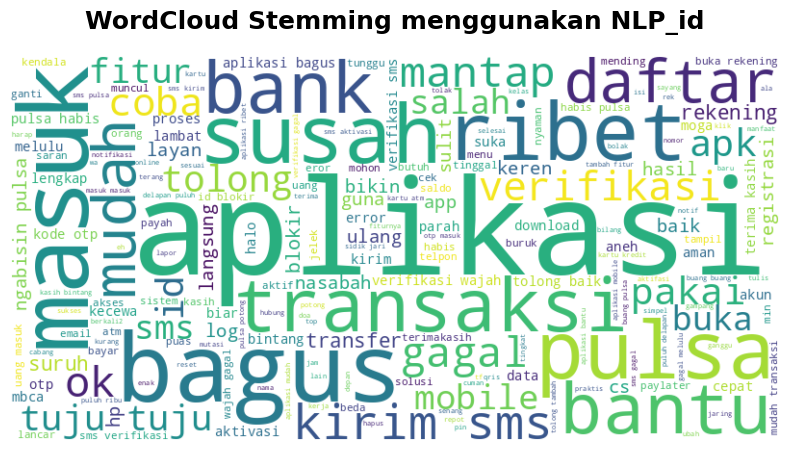

In [34]:
# @title wordclouds Stemming menggunakan NLP_id
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd


text = ' '.join(df_reviews_all_proses['content_proses_stemming_nlp_id'].apply(lambda x: str(x) if isinstance(x, (str, int, float)) else ''))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))

# Menampilkan word cloud dengan interpolasi gambar bilinear
plt.title("WordCloud Stemming menggunakan NLP_id", fontsize=18, fontweight='bold', pad=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

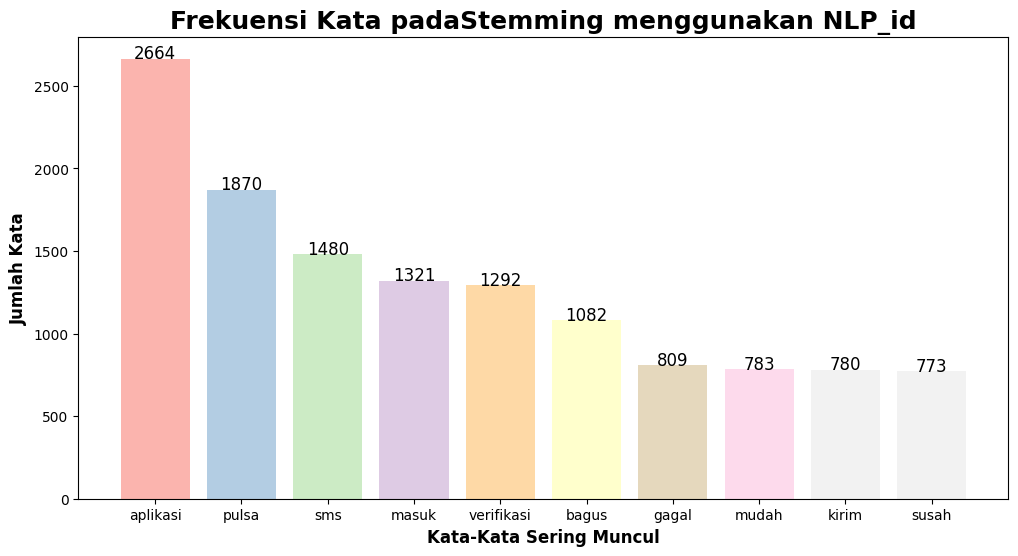

In [35]:
# @title Frekuensi Kata pada Stemming menggunakan NLP ID
import matplotlib.pyplot as plt
from collections import Counter

text = " ".join(df_reviews_all_proses['content_proses_stemming_nlp_id'])

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)

word, count = zip(*top_words)

# Definisikan palet warna dengan warna yang lebih lembut
colors = plt.cm.Pastel1(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata padaStemming menggunakan NLP_id", fontsize=18, fontweight='bold')
plt.xticks(rotation=0)

# Menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2, num + 0.3, str(num), fontsize=12, color='black', ha='center')

plt.show()

## Feature Engineering

In [36]:
df_reviews_all_proses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   reviewId                        11768 non-null  object
 1   score                           11768 non-null  int64 
 2   content                         11768 non-null  object
 3   content_cleaning                11768 non-null  object
 4   content_cleaning_normalized     11768 non-null  object
 5   content_tokenizing              11768 non-null  object
 6   content_part_of_speech          11768 non-null  object
 7   content_proses_stemming_nlp_id  11768 non-null  object
dtypes: int64(1), object(7)
memory usage: 735.6+ KB


In [37]:
df_reviews_all_proses.shape

(11768, 8)

### Labelling (Sentiment Score)

In [38]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import json
import reprlib
import requests

# Unduh VADER lexicon dari nltk
nltk.download('vader_lexicon')

# Membuat instance SentimentIntensityAnalyzer dan membersihkan leksikon default
sia1A, sia1B, sia2 = SentimentIntensityAnalyzer(), SentimentIntensityAnalyzer(), SentimentIntensityAnalyzer()
sia1A.lexicon.clear()
sia1B.lexicon.clear()
sia2.lexicon.clear()

# URL leksikon InSet dan SentiWords
inset_neg_url = 'https://raw.githubusercontent.com/onpilot/sentimen-bahasa/master/leksikon/inset/_json_inset-neg.txt'
inset_pos_url = 'https://raw.githubusercontent.com/onpilot/sentimen-bahasa/master/leksikon/inset/_json_inset-pos.txt'
sentiwords_id_url = 'https://raw.githubusercontent.com/onpilot/sentimen-bahasa/master/leksikon/sentistrength_id/_json_sentiwords_id.txt'

# Fungsi untuk mengunduh data dari URL
def download_lexicon(url):
    response = requests.get(url)
    response.raise_for_status()  # Raise an error for bad status codes
    return response.text

# Mendapatkan data dari URL
data1A = download_lexicon(inset_neg_url)
data1B = download_lexicon(inset_pos_url)
data2 = download_lexicon(sentiwords_id_url)

# Mengubah leksikon menjadi dictionary
insetNeg = json.loads(data1A)
insetPos = json.loads(data1B)
senti = json.loads(data2)

# Memperbarui leksikon VADER yang sudah 'dimodifikasi'
sia1A.lexicon.update(insetNeg)
sia1B.lexicon.update(insetPos)
sia2.lexicon.update(senti)

# Menampilkan sebagian dari leksikon yang diperbarui
print(reprlib.repr(sia1A.lexicon))
print(reprlib.repr(sia1B.lexicon))
print(reprlib.repr(sia2.lexicon))


{'(barang) bekas': -4, '(olahraga) bokser': -5, '(tua) uzur': -3, 'Anda': -4, ...}
{'(hujan) gerimis': 1, '(warna) dadu': 3, 'Ahad': 3, 'Sri paduka': 4, ...}
{'abadi': 5, 'absen': -3, 'abu-abu': -1, 'acuh': 4, ...}


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [39]:
def classify_sentiment(text, sia):
    scores = sia.polarity_scores(text)
    compound_score = scores['compound']
    if compound_score > 0:
        return 'positif'
    elif compound_score < 0:
        return 'negatif'
    else:
        return 'netral'

# Terapkan fungsi pada kolom DataFrame menggunakan leksikon yang diperbarui
df_reviews_all_proses['sentiment'] = df_reviews_all_proses['content_proses_stemming_nlp_id'].apply(lambda x: classify_sentiment(x, sia2))

# Tampilkan DataFrame dengan kolom sentimen
df_reviews_all_proses.head(5)

,reviewId,score,content,content_cleaning,content_cleaning_normalized,content_tokenizing,content_part_of_speech,content_proses_stemming_nlp_id,sentiment
0,348a6925-73b1-452c-b948-0040dce5df5f,1,Ribet loginmya,ribet loginmya,ribet loginmya,"[ribet, loginmya]","[(ribet, NN), (loginmya, NN)]",ribet loginmya,netral
1,286addb9-6089-47db-81c0-2e24b16046b2,5,Sangat membantu buat saya yang sedang merantau...,sangat membantu buat saya yang sedang merantau...,membantu merantau pelayanan ramah,"[membantu, merantau, pelayanan, ramah]","[(membantu, VB), (merantau, VB), (pelayanan, N...",bantu rantau layan ramah,positif
2,3a3ad41b-be92-44e0-8d4e-47e77af30967,1,Mke mybca saldo sering ilang Pertama 10rb Kedu...,mke mybca saldo sering ilang pertama 10rb kedu...,mke saldo 10rb 20rb ketiga 200rb mutasi gkada ...,"[mke, saldo, 10rb, 20rb, ketiga, 200rb, mutasi...","[(mke, NNP), (saldo, NN), (10rb, NUM), (20rb, ...",mke saldo 10rb 20rb tiga 200rb mutasi gkada du...,netral
3,0f9c37f2-4a07-40ff-ab28-c360171100d0,5,Mudah Dan Praktis,mudah dan praktis,mudah praktis,"[mudah, praktis]","[(mudah, JJ), (praktis, JJ)]",mudah praktis,positif
4,0c26990b-9daf-4192-a692-bc788ab6edbe,2,Saya sudah daftar dan sudh aktif di aplikasi m...,saya sudah daftar dan sudh aktif di aplikasi m...,daftar aktif aplikasi trf saldo link masuk²,"[daftar, aktif, aplikasi, trf, saldo, masuk²]","[(daftar, NN), (aktif, JJ), (aplikasi, NN), (t...",daftar aktif aplikasi trf saldo masuk,netral


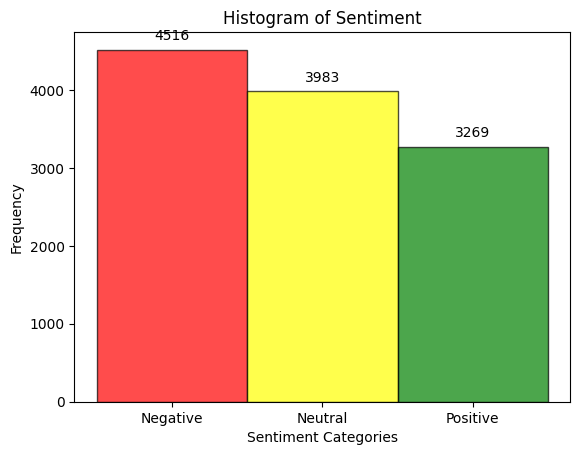

In [40]:
import matplotlib.pyplot as plt

# Extract the sentiment column
sentiment = df_reviews_all_proses['sentiment']

# Create a histogram with 3 bins
counts, bins, patches = plt.hist(sentiment, bins=3, edgecolor='black', alpha=0.7)

# Define bin labels and colors
bin_labels = ['Negative', 'Neutral', 'Positive']
colors = ['red', 'yellow', 'green']

# Add labels and title
plt.xlabel('Sentiment Categories')
plt.ylabel('Frequency')
plt.title('Histogram of Sentiment')

# Set x-axis tick labels at the center of each bin
plt.xticks([(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)], bin_labels)

# Color each bin separately
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

# Annotate the counts on the histogram
for count, patch in zip(counts, patches):
    height = patch.get_height()
    plt.annotate(f'{int(count)}', xy=(patch.get_x() + patch.get_width() / 2, height),
                 xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

# Show the plot
plt.show()


In [41]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_reviews_all_proses['sentiment_numeric'] = label_encoder.fit_transform(df_reviews_all_proses['sentiment'])

df_reviews_all_proses.head()


,reviewId,score,content,content_cleaning,content_cleaning_normalized,content_tokenizing,content_part_of_speech,content_proses_stemming_nlp_id,sentiment,sentiment_numeric
0,348a6925-73b1-452c-b948-0040dce5df5f,1,Ribet loginmya,ribet loginmya,ribet loginmya,"[ribet, loginmya]","[(ribet, NN), (loginmya, NN)]",ribet loginmya,netral,1
1,286addb9-6089-47db-81c0-2e24b16046b2,5,Sangat membantu buat saya yang sedang merantau...,sangat membantu buat saya yang sedang merantau...,membantu merantau pelayanan ramah,"[membantu, merantau, pelayanan, ramah]","[(membantu, VB), (merantau, VB), (pelayanan, N...",bantu rantau layan ramah,positif,2
2,3a3ad41b-be92-44e0-8d4e-47e77af30967,1,Mke mybca saldo sering ilang Pertama 10rb Kedu...,mke mybca saldo sering ilang pertama 10rb kedu...,mke saldo 10rb 20rb ketiga 200rb mutasi gkada ...,"[mke, saldo, 10rb, 20rb, ketiga, 200rb, mutasi...","[(mke, NNP), (saldo, NN), (10rb, NUM), (20rb, ...",mke saldo 10rb 20rb tiga 200rb mutasi gkada du...,netral,1
3,0f9c37f2-4a07-40ff-ab28-c360171100d0,5,Mudah Dan Praktis,mudah dan praktis,mudah praktis,"[mudah, praktis]","[(mudah, JJ), (praktis, JJ)]",mudah praktis,positif,2
4,0c26990b-9daf-4192-a692-bc788ab6edbe,2,Saya sudah daftar dan sudh aktif di aplikasi m...,saya sudah daftar dan sudh aktif di aplikasi m...,daftar aktif aplikasi trf saldo link masuk²,"[daftar, aktif, aplikasi, trf, saldo, masuk²]","[(daftar, NN), (aktif, JJ), (aplikasi, NN), (t...",daftar aktif aplikasi trf saldo masuk,netral,1


### pembobotan kata : TF IDF

In [42]:
from sklearn.model_selection import train_test_split
# @title membagi data latih dan data test
documents = df_reviews_all_proses['content_proses_stemming_nlp_id']
labels = df_reviews_all_proses['sentiment_numeric']
X_train, X_test, y_train, y_test = train_test_split(documents, labels, test_size=0.3, random_state=42)

In [43]:
# @title TF IDF
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Assuming df_reviews_all_proses is already defined and contains the column 'content_proses_stemming_nlp_id'
documents = df_reviews_all_proses['content_proses_stemming_nlp_id']

# Define the maximum number of features
max_features = 1000  # Adjust this as needed

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=max_features, binary=True)

# Fit and transform training documents into TF-IDF matrix
X_train_tfidf_matrix = tfidf_vectorizer.fit_transform(X_train)

# Transform testing documents into TF-IDF matrix
X_test_tfidf_matrix = tfidf_vectorizer.transform(X_test)


# Convert TF-IDF train matrix to DataFrame
df_tfidf_train = pd.DataFrame(X_train_tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
# Convert TF-IDF testing matrix to DataFrame
df_tfidf_test  = pd.DataFrame(X_train_tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

           term        rank
100       bagus  391.379320
78     aplikasi  374.288733
646          ok  307.540400
731       pulsa  275.172145
112       bantu  255.134688
541      mantap  225.029482
589       mudah  220.722304
840         sms  216.128530
548       masuk  211.991399
978  verifikasi  210.869837


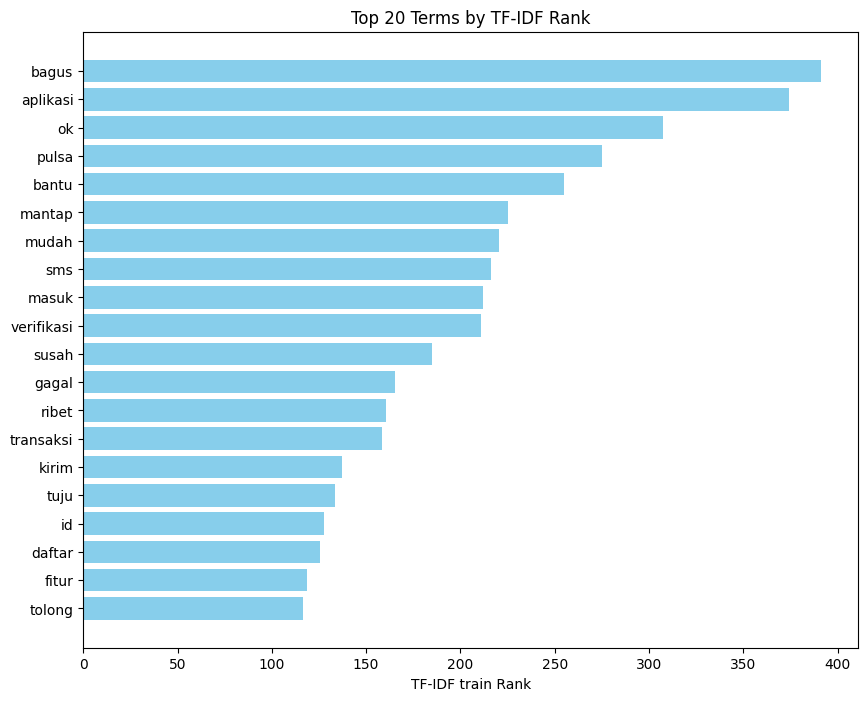

In [44]:
# @title tf idf data latih
# Display the DataFrame TF-IDF
terms = tfidf_vectorizer.get_feature_names_out()

# Sum TF-IDF frequency of each term through documents
sums = X_train_tfidf_matrix.sum(axis=0)

# Connecting term to its sums frequency
data_tfidf = []
for col, term in enumerate(terms):
    data_tfidf.append((term, sums[0, col]))

# Create a DataFrame with terms and their corresponding ranks
ranking = pd.DataFrame(data_tfidf, columns=['term', 'rank'])
ranking = ranking.sort_values('rank', ascending=False)

# Display the ranking DataFrame
print(ranking.head(10))

# Plot the top 20 terms by TF-IDF rank
plt.figure(figsize=(10, 8))
top_terms = ranking.head(20)
plt.barh(top_terms['term'], top_terms['rank'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('TF-IDF train Rank')
plt.title('Top 20 Terms by TF-IDF Rank')
plt.show()


           term        rank
78     aplikasi  172.301372
100       bagus  154.269905
731       pulsa  125.073072
646          ok  117.584269
541      mantap  115.112809
840         sms  101.205508
548       masuk   98.910583
978  verifikasi   92.042677
112       bantu   91.061889
855       susah   86.521370


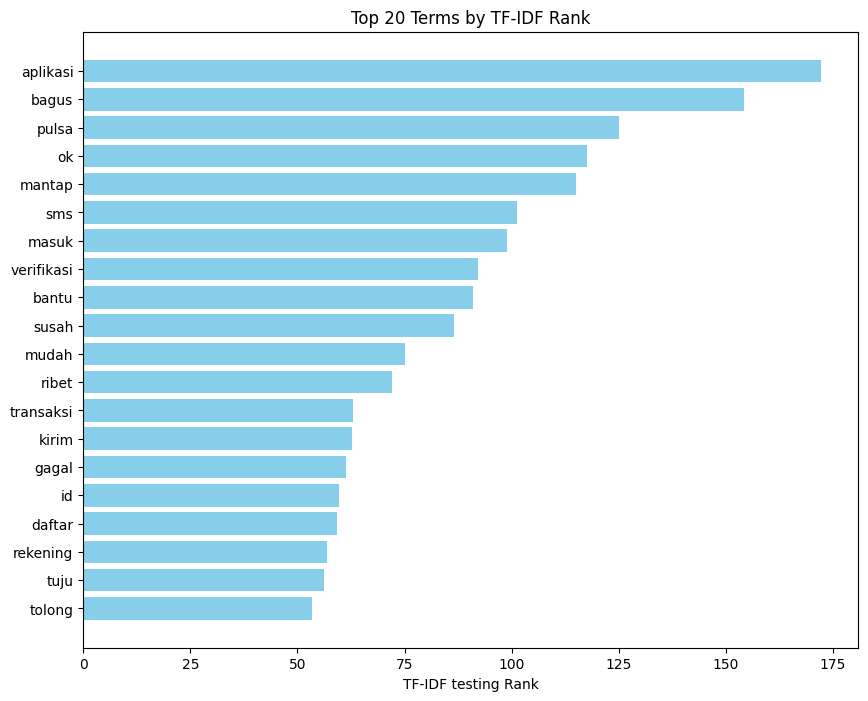

In [45]:
# @title tf idf data testing
# Display the DataFrame TF-IDF
terms = tfidf_vectorizer.get_feature_names_out()

# Sum TF-IDF frequency of each term through documents
sums = X_test_tfidf_matrix.sum(axis=0)

# Connecting term to its sums frequency
data_tfidf = []
for col, term in enumerate(terms):
    data_tfidf.append((term, sums[0, col]))

# Create a DataFrame with terms and their corresponding ranks
ranking = pd.DataFrame(data_tfidf, columns=['term', 'rank'])
ranking = ranking.sort_values('rank', ascending=False)

# Display the ranking DataFrame
print(ranking.head(10))

# Plot the top 20 terms by TF-IDF rank
plt.figure(figsize=(10, 8))
top_terms = ranking.head(20)
plt.barh(top_terms['term'], top_terms['rank'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('TF-IDF testing Rank')
plt.title('Top 20 Terms by TF-IDF Rank')
plt.show()

In [46]:

from imblearn.over_sampling import SMOTE
#@title imbalanced SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_tfidf_matrix, y_train)


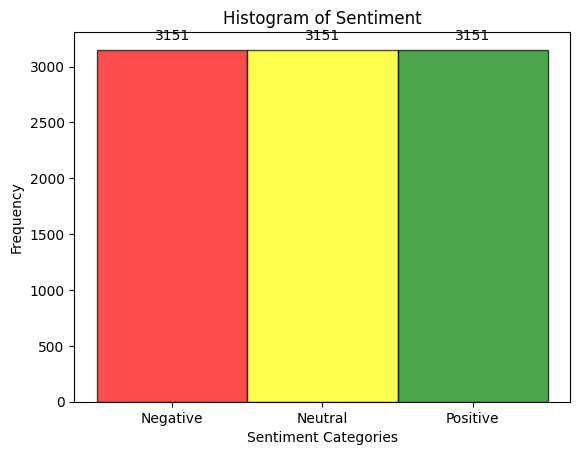

In [47]:
import matplotlib.pyplot as plt


# Create a histogram with 3 bins
counts, bins, patches = plt.hist(y_resampled, bins=3, edgecolor='black', alpha=0.7)

# Define bin labels and colors
bin_labels = ['Negative', 'Neutral', 'Positive']
colors = ['red', 'yellow', 'green']

# Add labels and title
plt.xlabel('Sentiment Categories')
plt.ylabel('Frequency')
plt.title('Histogram of Sentiment')

# Set x-axis tick labels at the center of each bin
plt.xticks([(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)], bin_labels)

# Color each bin separately
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

# Annotate the counts on the histogram
for count, patch in zip(counts, patches):
    height = patch.get_height()
    plt.annotate(f'{int(count)}', xy=(patch.get_x() + patch.get_width() / 2, height),
                 xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

# Show the plot
plt.show()


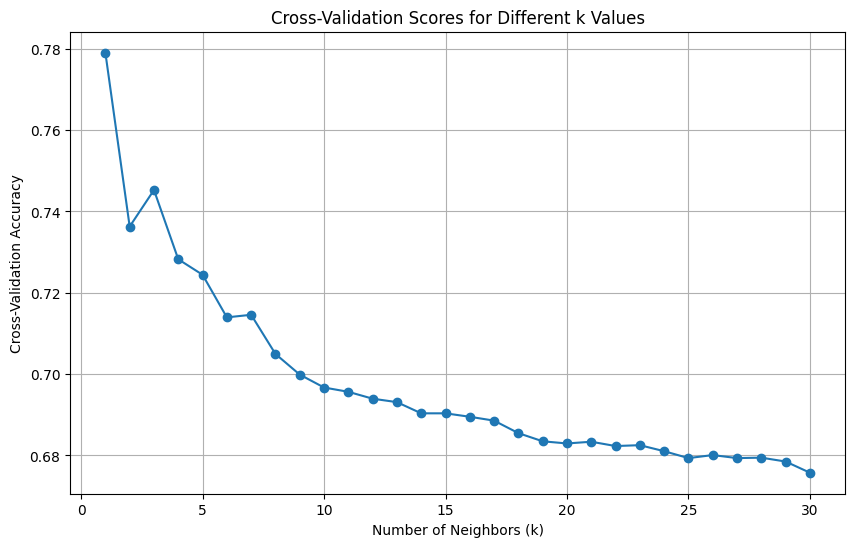

The optimal number of neighbors is 1 with a cross-validation accuracy of 0.78


In [48]:
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import matplotlib.pyplot as plt
#@title Determine the optimal number of neighbors using cross-validation and the elbow method
k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_resampled, y_resampled, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

# Plot the cross-validation scores to find the elbow point
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o')
plt.title('Cross-Validation Scores for Different k Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.grid(True)
plt.show()

# Find the optimal k (elbow point)
optimal_k = k_range[np.argmax(k_scores)]
print(f"The optimal number of neighbors is {optimal_k} with a cross-validation accuracy of {max(k_scores):.2f}")


# Modeling


In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [50]:
# Initialize the KNN classifier with k=3 (you can adjust k as needed)
knn = KNeighborsClassifier(n_neighbors=optimal_k)

# Train the KNN model
knn.fit(X_resampled, y_resampled)

KNeighborsClassifier(n_neighbors=1)

In [51]:
# Make predictions on the test data
y_pred = knn.predict(X_test_tfidf_matrix)

# Evaluasi

Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.82      0.69      1012
           1       0.78      0.74      0.76      1365
           2       0.86      0.63      0.73      1154

    accuracy                           0.73      3531
   macro avg       0.75      0.73      0.73      3531
weighted avg       0.75      0.73      0.73      3531



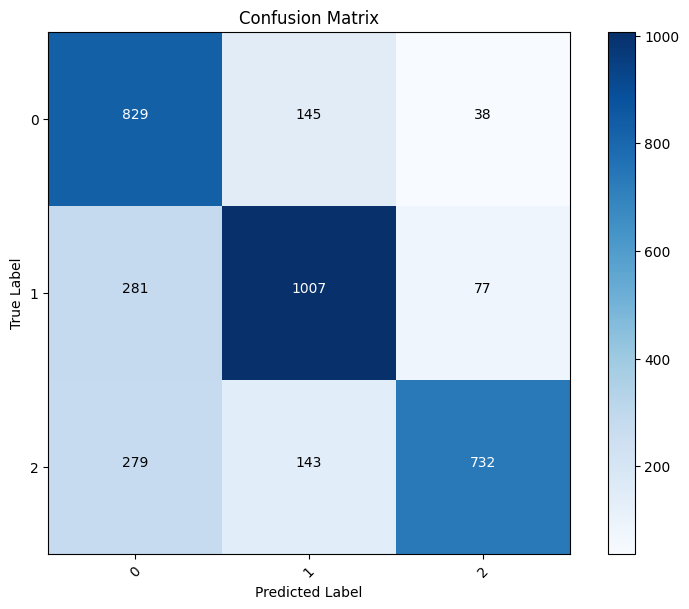

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

# Assuming y_test, y_pred, labels are already defined
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(class_report)

# Plot the confusion matrix using matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(labels)))
plt.xticks(tick_marks, np.unique(labels), rotation=45)
plt.yticks(tick_marks, np.unique(labels))

# Annotate the matrix
thresh = conf_matrix.max() / 2.
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [53]:
# Create a DataFrame with the predictions
df_predictions = pd.DataFrame({
    'Original Text': X_test,
    'True Label': y_test,
    'Predicted Label': y_pred
})

df_predictions

,Original Text,True Label,Predicted Label
10445,hasil mengkoneksikan rekening,1,0
6057,dftar id yapdhal signal bagus,2,1
10999,nyaman lengkap harap fitur mobile migrasi kesini,2,0
11310,suka bangeut rekening buka aplikasi,2,2
11258,mantap,2,2
...,...,...,...
1047,apl bagus bantu tolong makan ram hp thank,2,0
5118,bagus transaksi apa ewallet transfer bayar apa...,2,1
7496,the,1,1
2815,bantu,1,1
